# Week 6: Networks


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we are going to study how characters in the Marvel universe relate to each other using networks. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore the partnership network of the Marvel dataset

[**Feedback**](https://ulfaslak.com/vent)

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 6.0.1**: List three different real networks and state the nodes and links for each of them.

Travel network:
- nodes: destinations
- edges: flight paths

Internet network:
- nodes: users and servers
- edges: a network connection

Movie actor network:
- nodes: actors
- edges: connections from different actors based on roles in same movies

> **Ex. 6.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 


The kevin bacon network
- its nodes are actors and edges are the connections from different actors who stared in same movies
- it is a large as the number of actors in movies (total nodes)
- yes it can be mapped out
- if this is mapped out, we can find the relationship of how far apart each actor is from kevin bacon



> **Ex. 6.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

I believe social networking will have the biggest impact since it will give insights into the behavior of people. This is already used heavily in marketing strategies by companies and used to build recommendations for products, predict election results, and do sentiment analysis.

> **Ex. 6.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

A network that maps the distances from all cities to each other is dense as every single node will be connected to every other node.

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

[1, 2, 3, 4]
[(1, 2), (1, 3), (1, 4), (3, 4)]


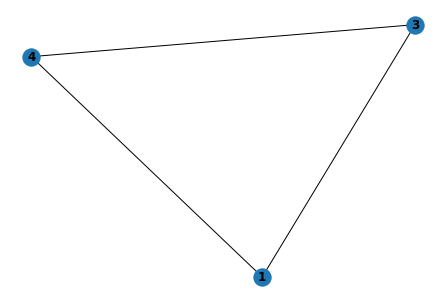

In [181]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (1,4), (3,4)])

print(G.nodes)
print(G.edges)

G.remove_node(2)

nx.draw(G, with_labels=True, font_weight='bold')

> **Ex. 6.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe how to create an ER network.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

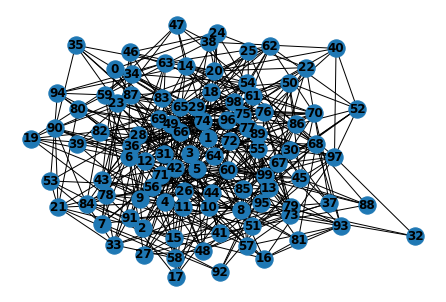

In [2]:
er = nx.erdos_renyi_graph(100, 0.1)

nx.draw(er, with_labels=True, font_weight='bold')

Text(0.5, 0, 'degree')

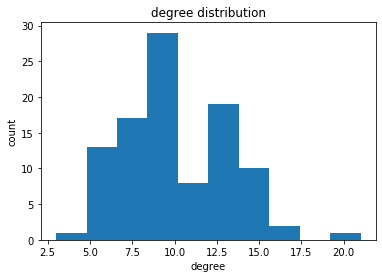

In [3]:
deg_list = []
nodes = []

for i in er.degree:
    deg_list.append(i[1])

plt.hist(deg_list)
plt.title("degree distribution")
plt.ylabel('count')
plt.xlabel('degree')

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

> The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. The network begins with an initial connected network of $m_0$ nodes.
New nodes are added to the network one at a time. Each new node is connected to $m \leq m_0$ existing nodes with a probability that is proportional to the number of links that the existing nodes already have. 

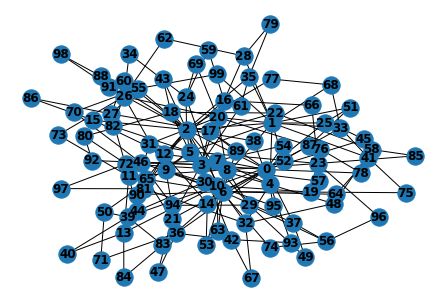

In [4]:
ba = nx.barabasi_albert_graph(100, 2)
nx.draw(ba, with_labels=True, font_weight='bold')

Text(0.5, 0, 'degree')

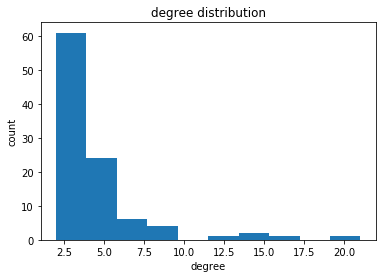

In [5]:
deg_list = []
nodes = []

for i in ba.degree:
    deg_list.append(i[1])
    nodes.append(i[0])
    
plt.hist(deg_list)
plt.title("degree distribution")
plt.ylabel('count')
plt.xlabel('degree')

> The BA graph is tail heavy when compared to the ER graph, which has a more even distribution
>
> Other methods of comparing the two networks could be to look at the number of strongly connected nodes and the shortest paths between each nodes

### Part 2: Marvel character partners

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze our Marvel dataset. The aim of the following exercises is to analyze the network *partnerships* between characters.

> **Ex. 6.2.1**: Write a function called `get_partners` that takes a character name, and extracts a list of their partners. Print the partnerships of Iron Man. They should be `['War Machine', 'Pepper Potts', 'Riri Williams']`.

>*Hint: Partnerships for a character are listed in the same way that alliances are. You can probably save yourself some time by looking at your solution to Ex. 4.1.1. Especially if you made use of regular expressions.*

In [6]:
import re, os

def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("./data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?\|.+=", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

get_partners("Iron Man")

['War Machine', 'Pepper Potts', 'Riri Williams']

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [95]:
#prepare data for graph

valid_chars=[]
valid_chars = set(valid_chars)


#add valid chars that have at least dim 1 to set
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]    
   
    for char in faction_chars:
        if len(get_partners(char)) != 0:
            valid_chars.add(char)
            
            
invalid_chars = []
invalid_chars = set(invalid_chars)

#remove chars with partners not in faction
for char in valid_chars:
    for partner in get_partners(char):
        if partner not in valid_chars:
            invalid_chars.add(partner)

valid_chars = valid_chars - invalid_chars

len(valid_chars)

251

In [106]:
#build graph
marvel_partners = nx.Graph()

#add nodes
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
    
    for char in faction_chars:
        if char in valid_chars:
            marvel_partners.add_node(char,faction_label=faction)

#add edges
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
    
    for char in faction_chars:
        partners = get_partners(char)
        if len(partners) != 0:
            for p in partners:
                if p in valid_chars:
                    marvel_partners.add_edge(char,p)
    

#remove nodes with no partners
isolated = list(nx.isolates(marvel_partners))
marvel_partners.remove_nodes_from(isolated) 

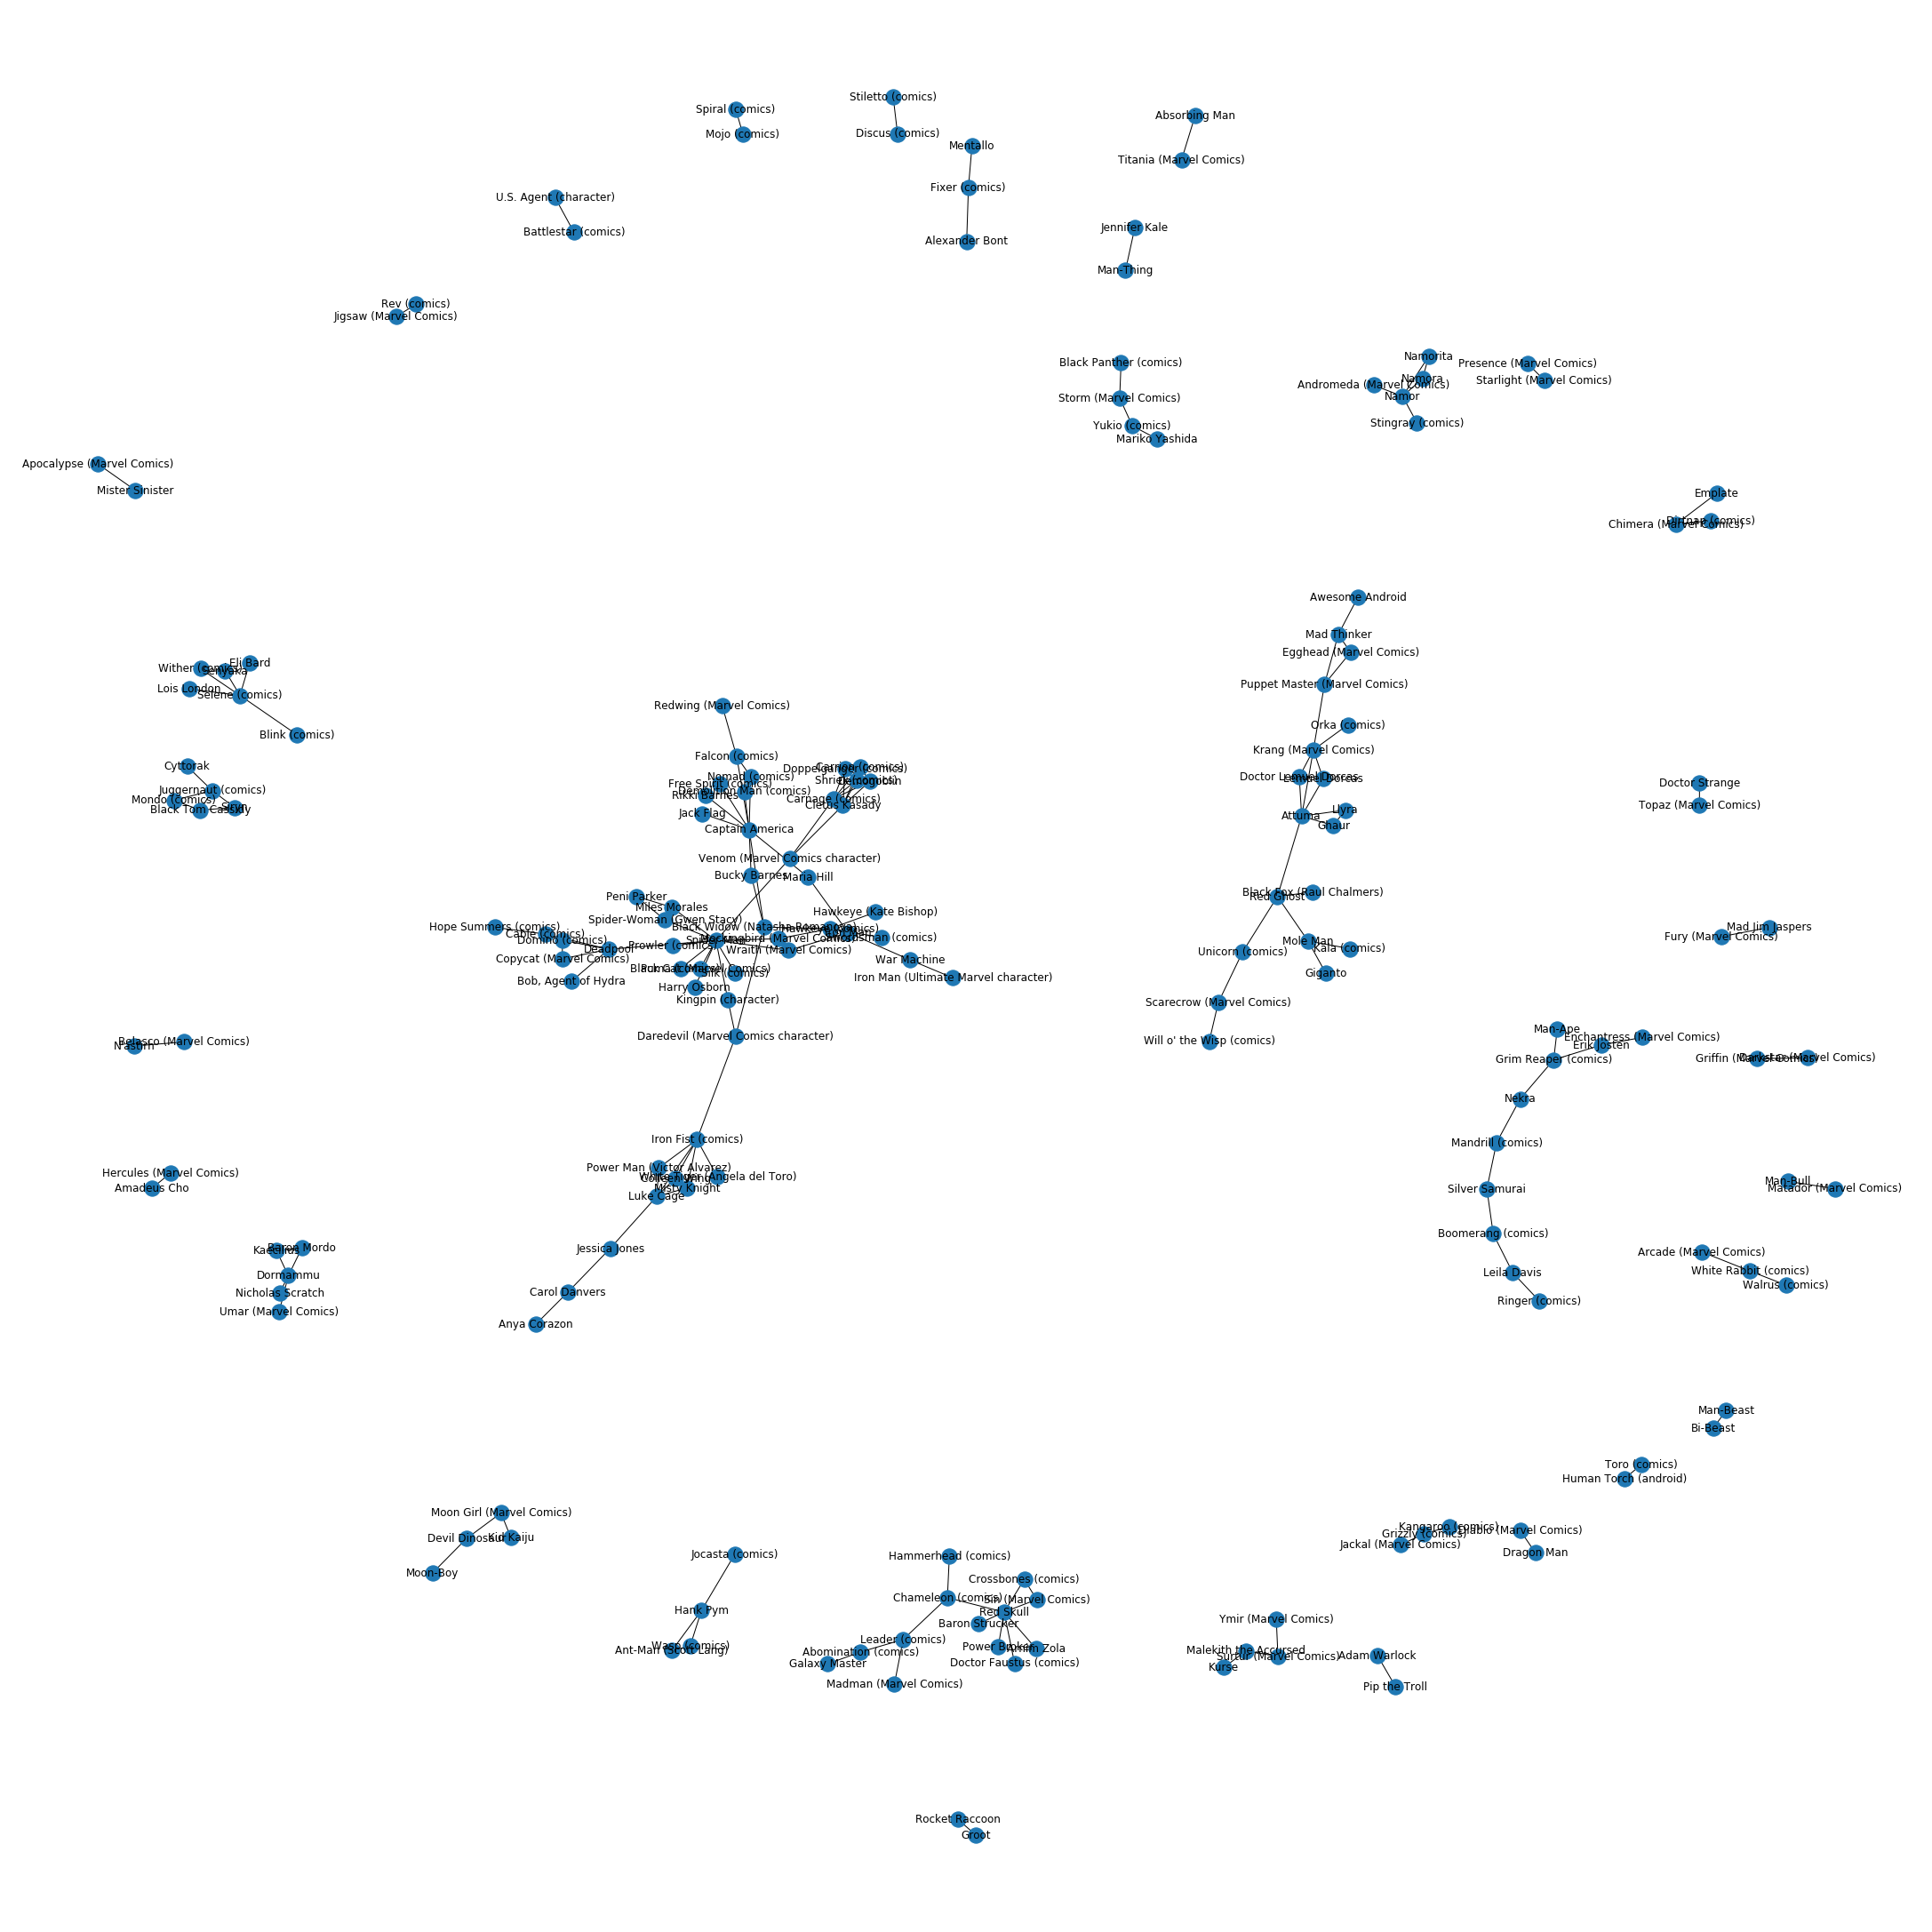

In [107]:
plt.figure (figsize =(30,30))
nx.draw(marvel_partners, with_labels=True)

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

Text(0.5, 0, 'degree')

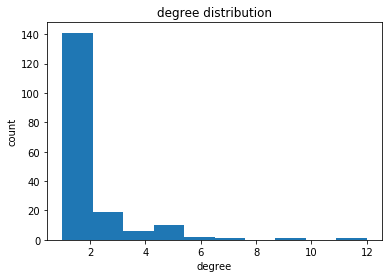

In [113]:
deg_list = []

for i in marvel_partners.degree:
    deg_list.append(i[1])

plt.figsize =(30,60)
plt.hist(deg_list)
plt.title("degree distribution")
plt.ylabel('count')
plt.xlabel('degree')

> This is similar to the BA network distribution by being tail heavy

> **Ex: 6.2.4**: Create a bar chart (similar in style to the one in Ex. 3.2.1) with the 10 most high-degree characters in each class. Make sure that each subfigure has the same y-axis (control with `plt.ylim` or use `plt.subplots` with parameter `sharey=True`).

In [140]:
hero_list = []
ambig_list = []
villain_list = []
missing_list = []

#grab list of characters from each faction and degree
for i in list(marvel_partners.nodes.data()):
    try:
        label = i[1]['faction_label']

        if label == 'heroes':
            hero_list.append({"name" : i[0], "deg" : marvel_partners.degree(i[0])})
        elif label == 'ambiguous':
            ambig_list.append({"name" : i[0], "deg" : marvel_partners.degree(i[0])})
        elif label == 'villains':
            villain_list.append({"name" : i[0], "deg" : marvel_partners.degree(i[0])})

    except:
        missing_list.append(i[0])

In [142]:
#sort by degree
hero_list = sorted(hero_list, key = lambda i: i['deg'], reverse = True) 
villain_list = sorted(villain_list, key = lambda i: i['deg'], reverse = True) 
ambig_list = sorted(ambig_list, key = lambda i: i['deg'], reverse = True) 

In [167]:
figure_num = 10

def grab_figures(attr_list, figure_num):
    temp = []
    figures = []
    names = []
    temp = attr_list[0:figure_num]
    for t in temp:
        figures.append(t['deg'])
        names.append(t['name'])

    return figures, names

<BarContainer object of 10 artists>

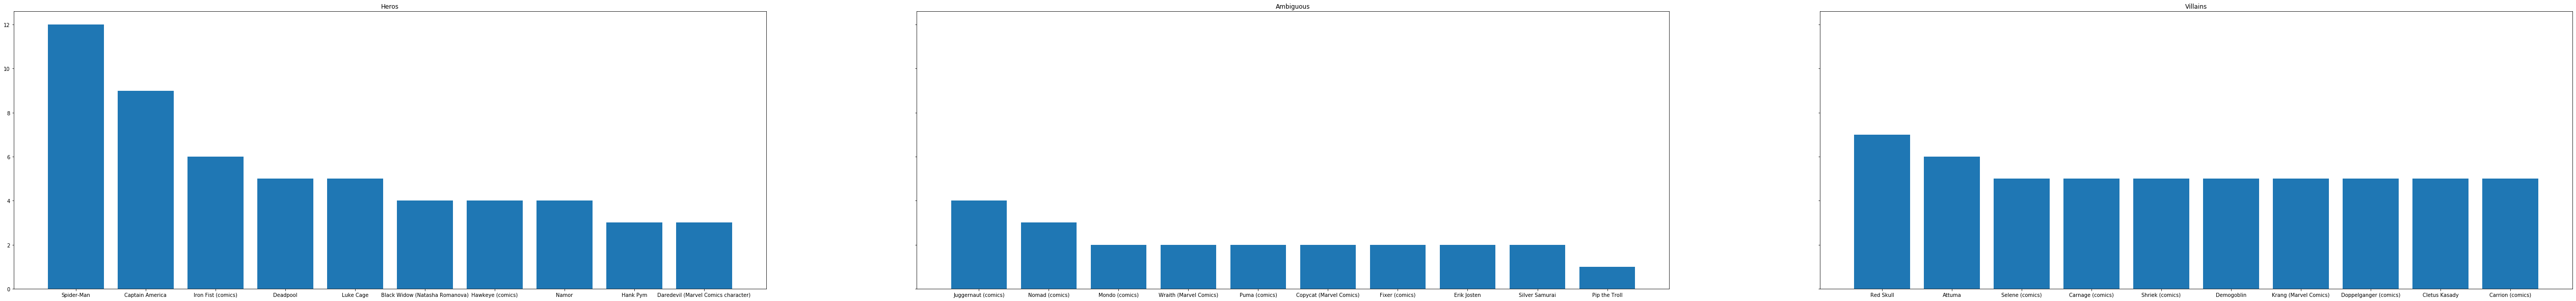

In [195]:
# plot graphs
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(90,10))
ax1.set_title("Heros", fontsize=12)
fig, names = grab_figures(hero_list, figure_num)
ax1.bar(names,fig)

ax2.set_title("Ambiguous", fontsize=12)
fig, names = grab_figures(ambig_list, figure_num)
ax2.bar(names,fig)

ax3.set_title("Villains", fontsize=12)
fig, names = grab_figures(villain_list, figure_num)
ax3.bar(names,fig)

> **Ex: 6.2.5**: Create a bar chart (similar in style to the one in Ex. 3.2.1) for each class with the characters that has the highest [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html) (BC). Again, make sure the y-axes are shared. When you comment on the result:
* Explain briefly what the BC measures (and why it takes a short while to compute it). An intuitive explanation is also great!
* Interpret, if you can, what the differences you see between the distribution of degree and BC means for the different classes.

In [229]:
betweenness = nx.betweenness_centrality(marvel_partners, k=None, normalized=True, 
                                        weight=None, endpoints=False, seed=None)

def get_faction_betweenness(faction_list,fig_size, split=True ):
    btwn_list=[]
    for i in faction_list:
        btwn_list.append({"name" : i['name'], "betweenness" : betweenness[i['name']]})
        
        btwn_list = sorted(btwn_list, key = lambda i: i['betweenness'], reverse = True)
        btwn_list = btwn_list[0:fig_size]
        
        if split == False:
            return btwn_list
        
        #return name and value seprately
        names = []
        val = []
        
        for e in btwn_list:
            names.append(e['name'])
            val.append(e['betweenness'])
        
           
    return names, val
               
hero_btwn_name, hero_btwn = get_faction_betweenness(hero_list, 10)
villain_btwn_name, villain_btwn = get_faction_betweenness(villain_list, 10)
ambig_btwn_name, ambig_btwn = get_faction_betweenness(ambig_list, 10)

<BarContainer object of 10 artists>

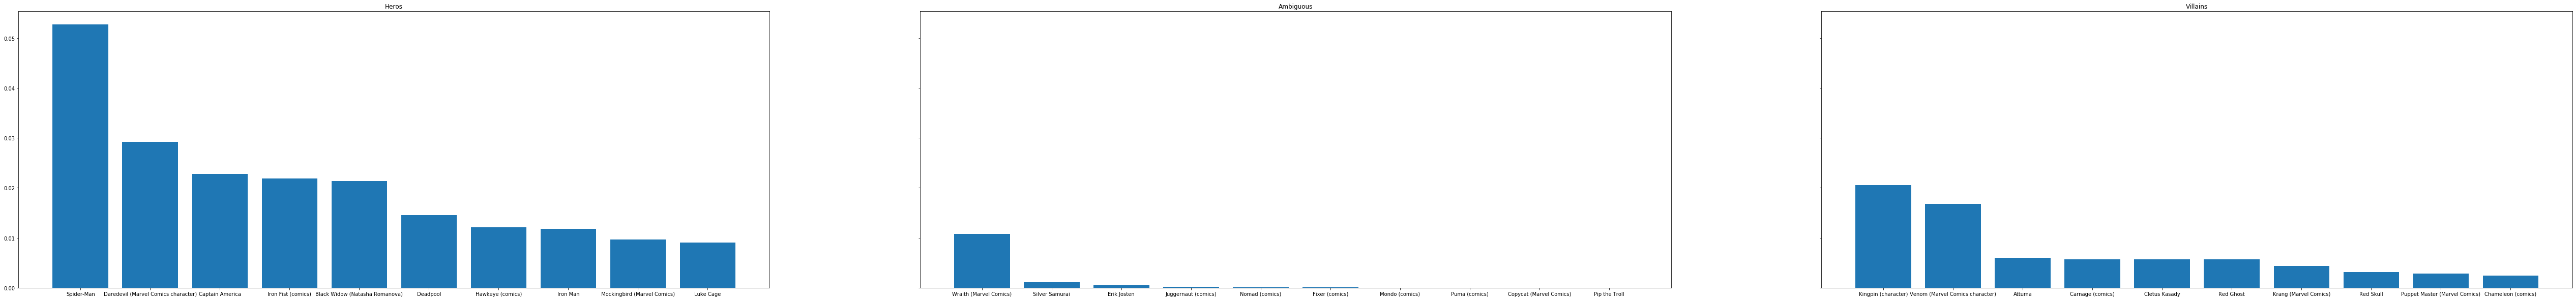

In [225]:
# plot graphs
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(90,10))
ax1.set_title("Heros", fontsize=12)
ax1.bar(hero_btwn_name,hero_btwn)

ax2.set_title("Ambiguous", fontsize=12)
ax2.bar(ambig_btwn_name, ambig_btwn)

ax3.set_title("Villains", fontsize=12)
ax3.bar(villain_btwn_name, villain_btwn)

> **Ex: 6.2.6**: Create yet another similar bar chart where instead you measure the [local clustering coefficient](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) (CC).
* Explain briefly what the CC measures, and what it intuitively means that a node is highly clustered (CC=1) or not clustered at all (CC=0).
* Interpret the difference between classes.

In [233]:
cluster = nx.clustering(marvel_partners, nodes=None, weight=None)

def get_faction_clustering(faction_list,fig_size, split=True ):
    cluster_list=[]
    for i in faction_list:
        cluster_list.append({"name" : i['name'], "clustering" : cluster[i['name']]})
        
        cluster_list = sorted(cluster_list, key = lambda i: i['clustering'], reverse = True)
        cluster_list = cluster_list[0:fig_size]
        
        if split == False:
            return cluster_list
        
        #return name and value seprately
        names = []
        val = []
        
        for e in cluster_listbtwn_list:
            names.append(e['name'])
            val.append(e['betweenness'])
        
           
    return names, val

               
hero_cluster_name, hero_cluster = get_faction_betweenness(hero_list, 10)
villain_cluster_name, villain_cluster = get_faction_betweenness(villain_list, 10)
ambig_cluster_name, ambig_cluster = get_faction_betweenness(ambig_list, 10)

<BarContainer object of 10 artists>

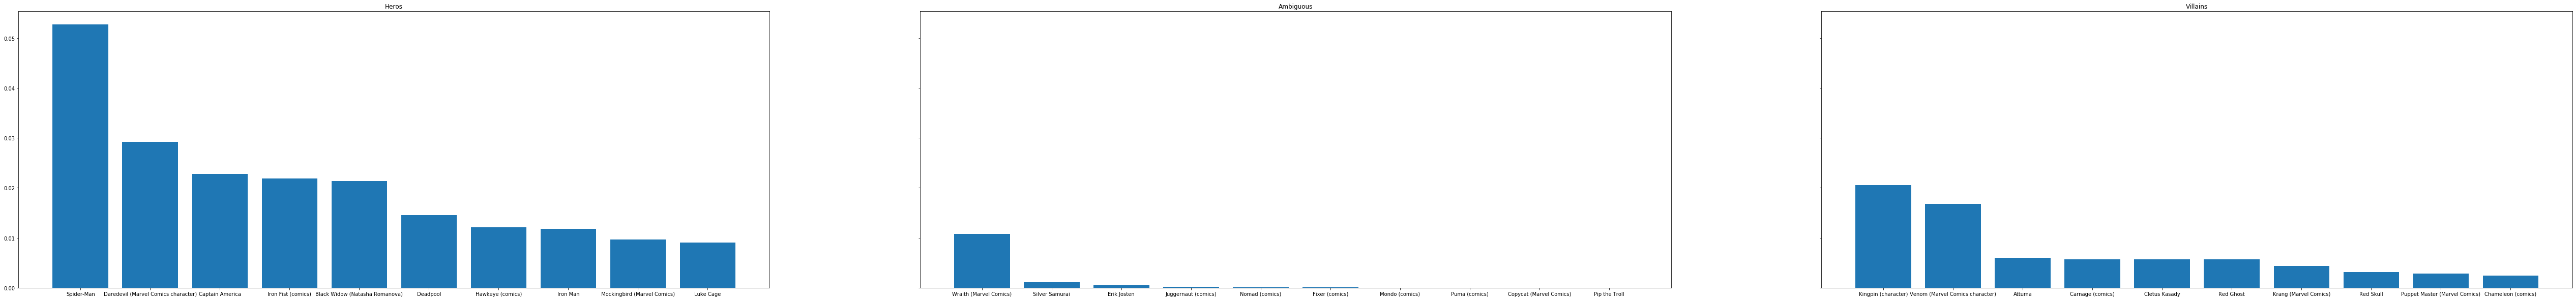

In [234]:
# plot graphs
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(90,10))
ax1.set_title("Heros", fontsize=12)
ax1.bar(hero_cluster_name,hero_cluster)

ax2.set_title("Ambiguous", fontsize=12)
ax2.bar(ambig_cluster_name, ambig_cluster)

ax3.set_title("Villains", fontsize=12)
ax3.bar(villain_cluster_name, villain_cluster)

> **Extra: Ex: 6.2**: There seems to be some correlation between BC, degree and clustering, but it definitely doesn't look perfect. Try to make a scatter plot of characters' degree vs. their BC. If time permits, pimp your plot by:
* Prettifying your plot by:
    * Setting appropriate axis limits and labels
    * Fontsizes, figure title, etc.
    * Adding a slight amount of *jitter* to the degree
* Coloring nodes by class (hero: blue, villain: red, ambiguous: yellow)
* Scaling node sizes by the CC (add an offset so no nodes have size 0).

> Highlight your findings:
* Which characters have an unusually high centrality compared to their degree and vice versa? How can you explain this?
* Does this inspire you to think about new things that can be investigated?

> **Ex: 6.2.7**: Let's make a nice plot of the network.I built a Python library called Netwulf (go `pip install netwulf`) that allows you to interactively plot networks in Python. Go ahead and produce a beautiful looking network using that!

In [235]:
import networkx as nx
from netwulf import visualize

visualize(marvel_partners)

(None, None)